In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import itertools
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('../Desktop/ćwiczenia na KMeans/basic3.csv')

In [3]:
data.head()

,x,y,color
0,591.141815,339.509605,1
1,152.000000,337.000000,0
2,306.383225,304.362656,2
3,532.384613,279.305239,1
4,231.786211,216.340788,2


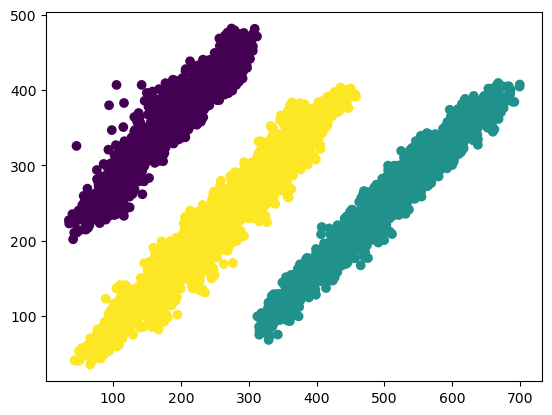

In [4]:
plt.scatter(data['x'], data['y'], c = data['color'])
plt.show()

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns = ['color']))

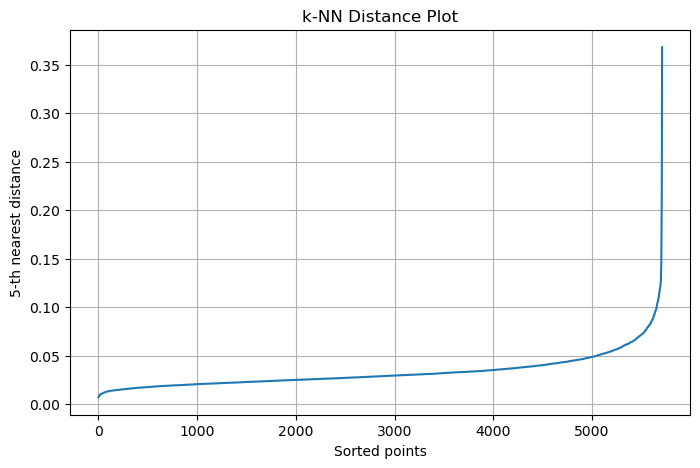

In [9]:
from sklearn.neighbors import NearestNeighbors
import itertools
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(scaled)
distances, indices = neigh.kneighbors(scaled)


distances = np.sort(distances[:, 5-1])  # Take the k-th distance for each point
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Sorted points")
plt.ylabel(f"{5}-th nearest distance")
plt.title("k-NN Distance Plot")
plt.grid(True)
plt.show()


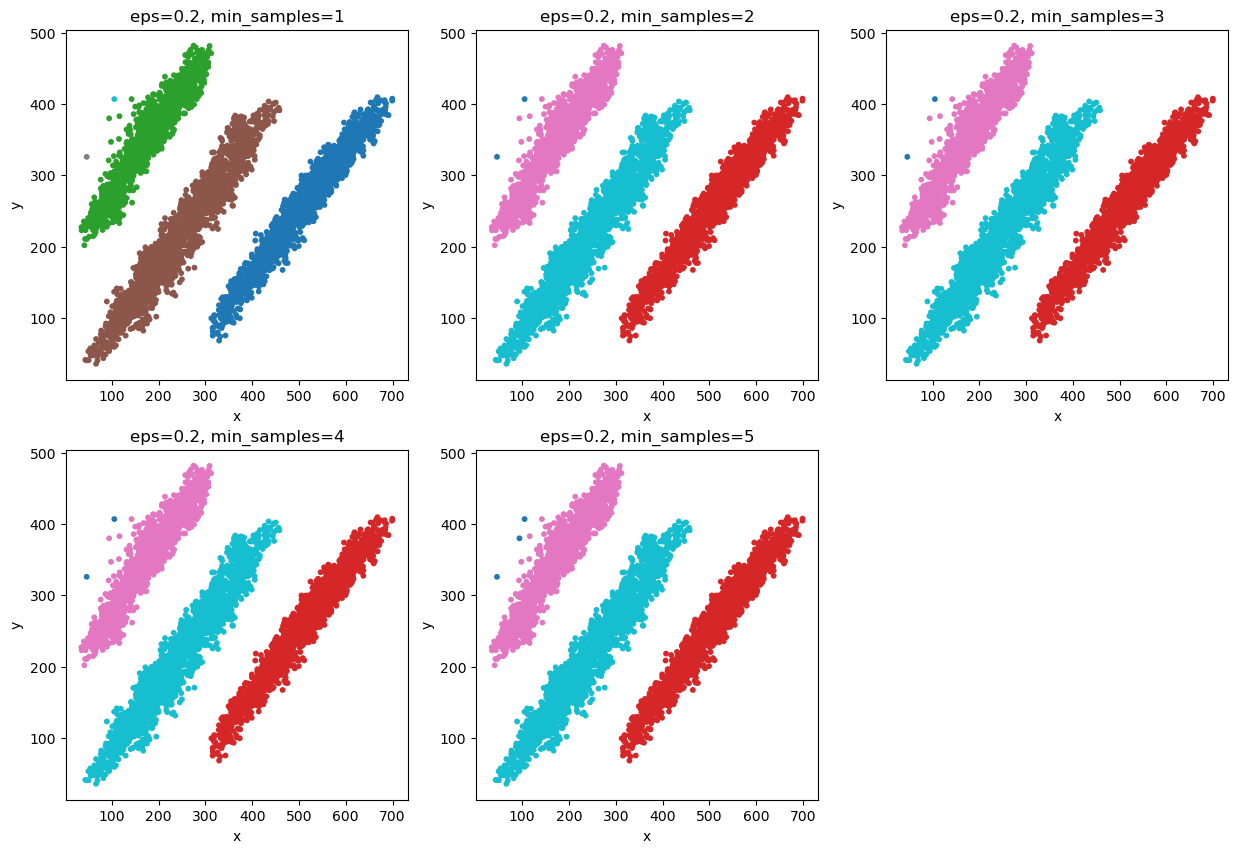

In [17]:
# Grid parameters
eps_values = [0.2]
min_samples_values = [1, 2, 3, 4, 5]


param_combinations = list(itertools.product(eps_values, min_samples_values))


num_combinations = len(param_combinations)
rows = (num_combinations // 3) + (num_combinations % 3 > 0)  


plt.figure(figsize=(15, 5 * rows))  
for i, (eps, min_samples) in enumerate(param_combinations, 1):
    # Creating the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data_scaled)

   
    plt.subplot(rows, 3, i)  
    scatter = plt.scatter(data['x'], data['y'], c=labels, cmap='tab10', s=10)
    plt.title(f"eps={eps}, min_samples={min_samples}")
    plt.xlabel("x")
    plt.ylabel("y")


In [ ]:
dbscan = DBSCAN(eps = 0.2, min_samples = 2) #solution
dbscan.fit(scaled)

In [20]:
ari = adjusted_rand_score(data['color'], dbscan.labels_)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.9993532555005041
